## Required Packages

In [45]:
## load packages required 

import random
from numpy import array
from numpy import sum
from typing import Tuple, Union
import numpy as np 

## Actions 

In [9]:
## Actions.py

"""Actions for the Prisoner's Dilemma and related utilities.
For convenience in other modules you can alias the actions:
from axelrod import Action
C, D = Action.C, Action.D
"""

from enum import Enum
from functools import total_ordering
from typing import Iterable, Tuple

@total_ordering
class Action(Enum):
    """Core actions in the Prisoner's Dilemma.
    There are only two possible actions, namely Cooperate or Defect,
    which are called C and D for convenience.
    """

    C = 0  # Cooperate
    D = 1  # Defect

    def __lt__(self, other):
        return self.value < other.value

    def __repr__(self):
        return self.name

    def __str__(self):
        return self.name

    def flip(self):
        """Returns the opposite Action."""
        if self == Action.C:
            return Action.D
        return Action.C

## Player Class and Strategies

In [55]:
## creation of the player class and stratagies

C, D = Action.C, Action.D  

class Player(object):
    
    name = "Player"
    
    def __init__(self):
        """Initial class setup."""
        ## self._history = History()
        self._history = [] 
        self._opponent_history = []
                           
    def update_history(self, play):
        self._history.append(play)

    def history(self):
        return self._history

## Strategy Classes;
        
class Defector(Player):
    """A player who only ever defects.
    """
    name = "Defector"

    def strategy(self) -> Action:
        """Actual strategy definition that determines player's action."""
        return D    
    
    
class Cooperator(Player):
    """A player who only ever cooperates.
    """
    name = "Cooperator"

    def strategy(self) -> Action:
        """Actual strategy definition that determines player's action."""
        return C

    
class Alternator(Player):
    """
    A player who alternates between cooperating and defecting.
    """
    name = "Alternator"
    
    def strategy(self) -> Action:
        """Actual strategy definition that determines player's action."""
        if len(self._history) == 0:
            return C
        if self._history[-1] == C:
            return D
        return C    

class Random(Player):
    """
    A player who randomly alternates between cooperating and defecting.
    """
    name = "Random"
    
    def strategy(self) -> Action:
        """Actual strategy definition that determines player's action."""
        return random.choice((C, D))

class T4T(Player):
    """
    A player who cooperates until one of his opponents defects.
    """
    name = "T4T"
    
    def strategy(self) -> Action:
        """Actual strategy definition that determines player's action."""
        if len(self._opponent_history) == 0:
            return C
        if D in self._opponent_history[-1]:
            return D
        return C

## Game Design

In [11]:
Score = Union[int, float]

class Game(object):
    """Container for the game matrix and scoring logic.
    Attributes
    ----------
    scores: dict
        The numerical score attribute to all combinations of action triplets.
    """

    def __init__(        
        self, q: Score = 7, s: Score = 3, t: Score = 9, u: Score = 0, v: Score = 5, p: Score = 1
    ) -> None:
        
        """Create a new game object.
        Parameters
        ----------
        q: int or float
            Score obtained by all players for mutual cooperation.
        s: int or float
            Score obtained by a player for cooperating with the majority (who are cooperating).
        t: int or float
            Score obtained by a player for defecting against the majority (who are cooperating).
        u: int or float
            Score obtained by a player for cooperating against the majority (who are defecting).        
        v: int or float
            Score obtained by a player for defecting with the majority (who are defecting).
        p: int or float
            Score obtained by all players for mutual defection.
        """
        
        self.scores = {
            (C, C, C): (q, q, q),
            

            (C, C, D): (s, s, t),
            (C, D, C): (s, t, s),
            (D, C, C): (t, s, s),
            
            (C, D, D): (u, v, v),
            (D, C, D): (v, u, v),
            (D, D, C): (v, v, u),            
            
            (D, D, D): (p, p, p),
        }

    def score(self, triple: Tuple[Action, Action, Action]) -> Tuple[Score, Score, Score]:
        
        """Returns the appropriate score for a decision triplet.
        Parameters
        ----------
        pair: tuple(Action, Action, Action)
            A pair actions for three players, for example (C, C, C).
        Returns
        -------
        tuple of int or float
            Scores for three players resulting from their actions.
        """
        
        return self.scores[triple]

## Match Design

In [40]:
class Match(object):
    """The Match class conducts matches between three players."""

    def __init__(self, players, turns):
        """
        Parameters
        ----------
        players : tuple
            A triplet of player objects
        turns : integer
            The number of turns per match
        """
        self.result = []
        self.players = list(players)
        self.turns = turns

    def simultaneous_play(self, Player_1, Player_2, Player_3):
        
        """This pits three players against each other."""
        
        s1, s2, s3 = Player_1.strategy(), Player_2.strategy(), Player_3.strategy()
        Player_1.update_history(s1)
        Player_2.update_history(s2)
        Player_3.update_history(s3)
        
        Player_1._opponent_history.append((s2, s3))
        Player_2._opponent_history.append((s1, s3))
        Player_3._opponent_history.append((s1, s2))
        
        return s1, s2, s3
                        
    def play(self):
        
        """
        A list of the form:
        e.g. for a 2 turn match:
            [(C, C, C), (C, D, D)]
        i.e. One entry per turn containing a triplet of actions.
        """
        result = []
        turns = self.turns
        
        for _ in range(turns):
            plays = self.simultaneous_play(
                self.players[0], self.players[1], self.players[2]
            )
            result.append(plays)

        self.result = result
        return result

    
    


In [13]:
def compute_scores(interactions, game=None):
    """Returns the scores of a given set of interactions."""
    if not game:
        game = Game()
    return [game.score(plays) for plays in interactions]

## Playing a Match -

In [64]:
Player_1 = Cooperator()
Player_2 = Random()
Player_3 = Defector()

Players = [Player_1, Player_2, Player_3]

match = Match(Players,25)
interactions = match.play()

compute_scores(interactions)

final_scores= array(compute_scores(interactions))
sum(final_scores, 0)

array([ 39,  99, 177])

In [ ]:
def score_per_round(sum_of_scores):
    multiplied_list = element * (1/25) for element in sum_of_scores
    return multiplied_list

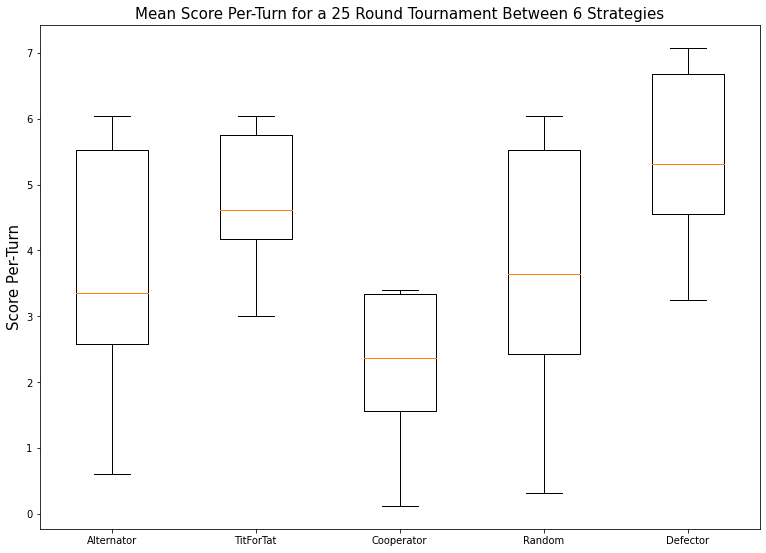

In [82]:
import matplotlib.pyplot as plt
import numpy as np

Alternator = (151 / 25, 69 / 25, 15 / 25, 151 / 25, 99 / 25, 63 / 25)
TitForTat = (151 / 25, 108 / 25, 75 / 25, 151 / 25, 123 / 25, 103 / 25)
Cooperator = (79 / 25, 85 / 25, 39 / 25, 85 / 25, 3 / 25, 39 / 25)
Random = (83 / 25, 151 / 25, 53 / 25, 151 / 25, 8 / 25, 99 / 25)
Defector = (81 / 25, 177 / 25, 137 / 25, 129 / 25, 109 / 25, 177 / 25)
data = [Alternator, TitForTat, Cooperator, Random, Defector]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
x = ["Alternator","TitForTat","Cooperator","Random","Defector"]
bp = ax.boxplot(data)

plt.title("Mean Score Per-Turn for a 25 Round Tournament Between 6 Strategies", fontsize=15)

plt.ylabel('Score Per-Turn', fontsize=15)
plt.xticks([1, 2, 3, 4, 5], ["Alternator","TitForTat","Cooperator","Random","Defector"])
# show plot
plt.show()
